<a href="https://colab.research.google.com/github/ShiyuGong/shiyugong.github.io/blob/master/red_wine_quality_eda_and_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Overview ***

This project mainly explores the relationship between red wine quality with wine’s physicochemical and sensory variables (1 - fixed acidity; 2 - volatile acidity; 3 - citric acid; 4 - residual sugar; 5 – chlorides; 6 - free sulfur dioxide; 7 - total sulfur dioxide; 8 – density; 9 – pH; 10 – sulphates; 11 - alcohol Output variable). In addition, EDA(seaborn and ggplot) and multiple machine learning algorithms are used to determine which physiochemical properties have impact on a wine’s quality.


# Ingest

In [0]:
!pip uninstall -q -y plotly
!pip install -q plotly
!pip install -q --upgrade cufflinks

import pandas as pd
import numpy as np

In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [0]:
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.offline as offline
import plotly.graph_objs as go

In [0]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/ShiyuGong/Data/master/winequality-red.csv') 

In [0]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Exploratory Data Analysis

### Seaborn: Correlation Heatmap

In [0]:
import seaborn as sns
color = sns.color_palette()

import matplotlib.pyplot as plt
sns.set(style="white")

In [0]:
# Calculate the correlation
corr= df_wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


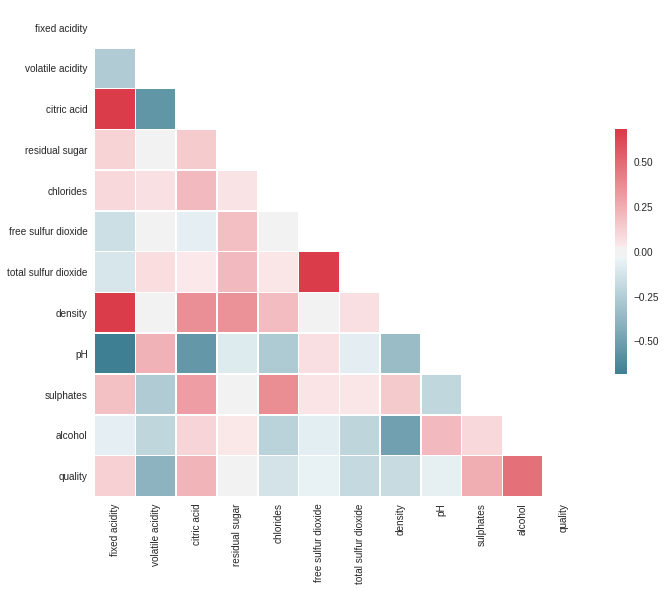

In [0]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Based on the heatmap above, except for "residual sugar", 'free sulfur dioxide' and 'pH', other variables seem to have some relationships with “quality”.

In [0]:
df_wine.drop(["residual sugar",'free sulfur dioxide','pH'],axis = 1,inplace = True)

In [0]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


### Seaborn: pairplot

Arbitrary cutoffs are set for the dependent variable (wine quality) and independent variable (alcohol) based on their distributions in order to facilitate the further analysis.  

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



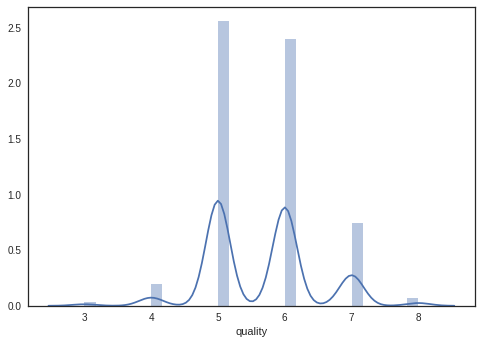

In [0]:
sns.distplot(df_wine['quality'])
plt.show()

In [0]:
# Bin "quality" variable into three levels: poor, normal and excellent

bins = [0, 4, 6, 10]
labels = ["poor","normal","excellent"]
df_wine['binned_quality'] = pd.cut(df_wine['quality'], bins=bins, labels=labels)
df_wine.head()
df_wine.drop('quality',axis =1, inplace = True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



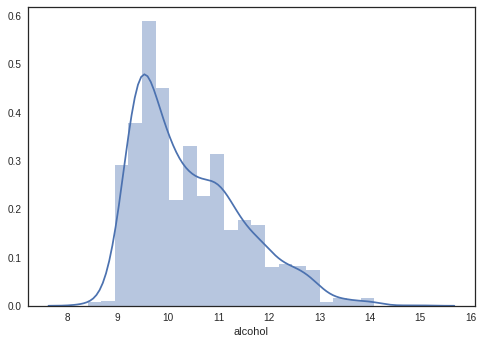

In [0]:
sns.distplot(df_wine['alcohol'])
plt.show()

In [0]:
# Bin "alcohol" variable into three levels: low, median and high

bins = [0, 10, 12, 15]
labels = ["low alcohol","median alcohol","high alcohol"]
df_wine['binned_alcohol'] = pd.cut(df_wine['alcohol'], bins=bins, labels=labels)
df_wine.drop('alcohol',axis =1, inplace = True)

In [0]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,binned_quality,binned_alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,normal,low alcohol
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,normal,low alcohol
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,normal,low alcohol
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,normal,low alcohol
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,normal,low alcohol


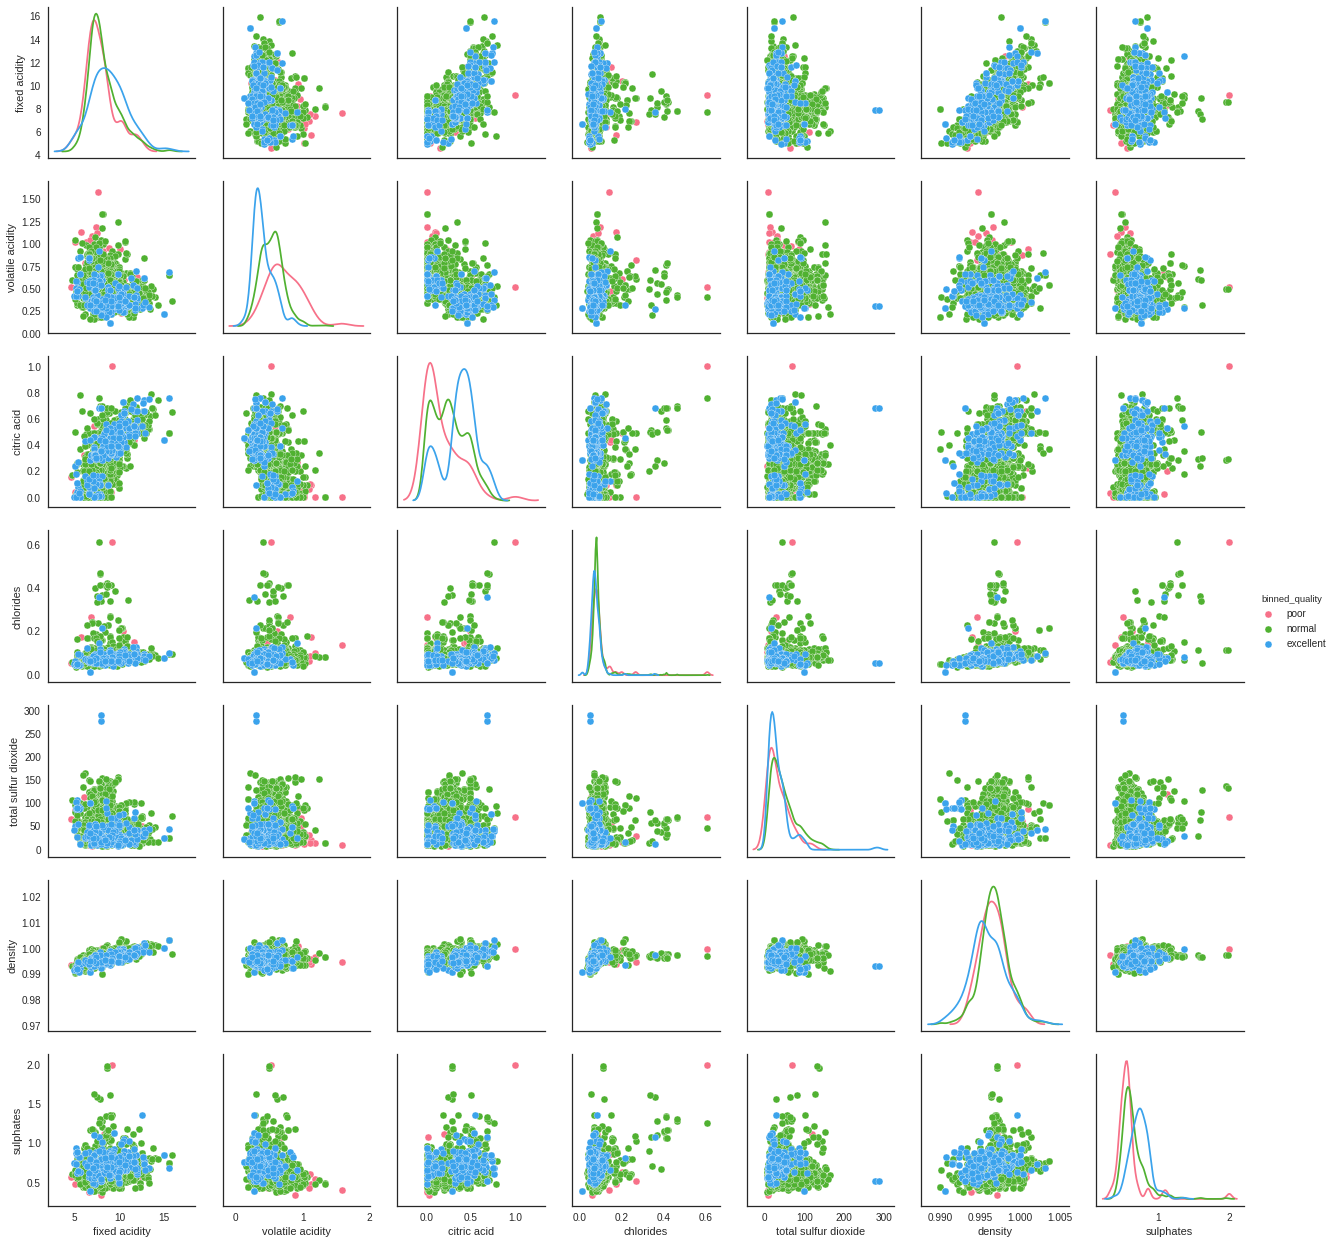

In [0]:
sns_plot = sns.pairplot(df_wine, hue="binned_quality", palette="husl",
             diag_kind="kde")
sns_plot.savefig("pairplot.png")

According to the pairplot above, "volatile acidity" and "citric acid" are two variables whose distributions are rather distinguishable among three-level quality.

# ML algorithms and model comparison

In [0]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [0]:
df_wine_ml = df_wine.copy()
df_wine_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 9 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
chlorides               1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
sulphates               1599 non-null float64
binned_quality          1599 non-null category
binned_alcohol          1599 non-null category
dtypes: category(2), float64(7)
memory usage: 90.8 KB


In [0]:
#get dummies
df_wine_ml = pd.get_dummies(df_wine_ml, columns=["binned_alcohol"], drop_first=True)
df_wine_ml.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,binned_quality,binned_alcohol_median alcohol,binned_alcohol_high alcohol
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,normal,0,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,normal,0,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,normal,0,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,normal,0,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,normal,0,0


### sklearn StandardScaler

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df_wine_ml.drop('binned_quality',axis=1))
scaled_features = scaler.transform(df_wine_ml.drop('binned_quality',axis=1))
df_wine_ml_sc = pd.DataFrame(scaled_features, columns=df_wine_ml.columns.difference(['binned_quality']))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.



### train_test_split

In [0]:
# use 70% of the data for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_wine_ml.drop( "binned_quality",axis=1), df_wine_ml["binned_quality"], test_size=0.30, random_state=101)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(df_wine_ml_sc, df_wine_ml["binned_quality"], test_size=0.30, random_state=101)

In [0]:
# unscaled
X_train_all = df_wine_ml.drop("binned_quality",axis=1)
y_train_all = df_wine_ml["binned_quality"]


# scaled
X_train_all_sc = df_wine_ml_sc
y_train_all_sc = df_wine_ml["binned_quality"]


### 1. Logistic Regression

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print(accuracy_score(y_test, pred_logreg))

0.8041666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [0]:
logreg.coef_

array([[ 0.07985572, -2.77389099,  1.05495184, -1.11838062, -0.01382077,
        -1.78725271,  2.18943343,  1.24861087,  2.83707247],
       [-0.0172753 ,  0.2072997 , -1.42733547,  1.01547491,  0.01488861,
         1.61231135, -1.68249772, -0.80359027, -2.11643461],
       [-0.29890144,  2.87195532,  0.65718029,  0.38736349, -0.0128842 ,
        -0.81289457, -0.58790096, -0.32010861, -1.25010106]])

### 2. Gaussian Naive Bayes¶

In [0]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, pred_gnb))

0.23958333333333334


### 3. kNN

In [0]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_sc,y_train_sc)
pred_knn = knn.predict(X_test)
print(accuracy_score(y_test, pred_knn))

0.8083333333333333


### 4. Decision Tree

In [0]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)
print(accuracy_score(y_test, pred_dtree))

0.7770833333333333


In [0]:
dtree_2 = DecisionTreeClassifier(max_features=7 , max_depth=6,  min_samples_split=8)
dtree_2.fit(X_train,y_train)
pred_dtree_2 = dtree_2.predict(X_test)
print(accuracy_score(y_test, pred_dtree_2))

0.79375


### 5. Random Forest

In [0]:
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, pred_rfc))

0.825


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [0]:
# feature importance
importances = pd.DataFrame({'feature':X_train.columns,
                            'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
volatile acidity,0.229
sulphates,0.187
binned_alcohol_high alcohol,0.125
density,0.105
fixed acidity,0.086
citric acid,0.086
total sulfur dioxide,0.082
chlorides,0.079
binned_alcohol_median alcohol,0.021


### 6. SVM

In [0]:
svc = SVC(gamma = 0.01, C = 100, probability=True)
svc.fit(X_train_sc, y_train_sc)
pred_svc = svc.predict(X_test_sc)
print(accuracy_score(y_test_sc, pred_svc))

0.81875


## K fold cross-validation

Among 6 algorithms above, logistic regression, kNN, SVM and random forest have the highest accuracy rate. Thus, K fold cross-validation is used here to further estimate model accuracy.

**For logistic regression:**

In [0]:
scores_logreg = cross_val_score(logreg, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_logreg)
print(scores_logreg.mean())

[0.8136646  0.81987578 0.83850932 0.825      0.85625    0.85
 0.76875    0.8490566  0.85534591 0.82911392]
0.8305566129214897


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist

**For knn:**

In [0]:
scores_knn = cross_val_score(knn, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_knn)
print(scores_knn.mean())

[0.81987578 0.81987578 0.80124224 0.83125    0.875      0.85625
 0.78125    0.80503145 0.83647799 0.84810127]
0.8274354488604925


 **For SVM:**

In [0]:
scores_svc = cross_val_score(svc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.8136646  0.83229814 0.83850932 0.8375     0.8625     0.83125
 0.81875    0.83647799 0.86792453 0.84177215]
0.8380646717311446


**For rfc:**

In [0]:
scores_rfc = cross_val_score(rfc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.81987578 0.81987578 0.80745342 0.80625    0.83125    0.825
 0.775      0.8427673  0.87421384 0.82278481]
0.8224470911146154


Based on k fold cross-validation, SVM(Support vector machine) has the best performance. 

# SHAP: Explain predictions

In [0]:
!pip install -q shap

In [0]:
import sklearn
import shap

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
shap.initjs()
explainer = shap.KernelExplainer(svc.predict_proba, X_train_sc, link="logit")
shap_values = explainer.shap_values(X_test_sc, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test_sc.iloc[0,:], link="logit")

Using 1119 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.

100%|██████████| 480/480 [16:37<00:00,  2.07s/it]


### Confusion matrix, without normalization for SVM

In [0]:
df= pd.DataFrame(y_test_sc)
df['binned_quality'].value_counts()

normal       388
excellent     68
poor          24
Name: binned_quality, dtype: int64

In [0]:
from sklearn.metrics import confusion_matrix
# creating a confusion matrix 
cm = confusion_matrix(y_test_sc, pred_svc) 
cm

array([[ 18,  50,   0],
       [ 13, 375,   0],
       [  0,  24,   0]])

In [0]:
names = ["excellent","normal","poor"]
df = pd.DataFrame(cm, index=names, columns=names)
df

,excellent,normal,poor
excellent,18,50,0
normal,13,375,0
poor,0,24,0


However, what we should not ignore is that the wine quality classes are ordered and **not balanced** (e.g. there are much more normal wines than excellent or poor ones). Consequently, as we can see from the confusion matrix above, the predictive ability of the model for normal class(accuracy rate = 0.966) is much better than poor(accuracy rate = 0) and excellent class(accuracy rate = 0.265). 

For the next step, we should try to find out methods to improve the model performance for unbalanced dataset. 